# Exploratory Data Analysis

In [1]:
## Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import sktime
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.fbprophet import Prophet

In [2]:
## Create dataframe using ecommerce_dataset.csv
ecommerce_df = pd.read_csv("DataSource/ecommerce_dataset.csv")
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
## Add Column that calculates OrderAmount
ecommerce_df["OrderAmount"] = ecommerce_df.Quantity * ecommerce_df.UnitPrice
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
## Review Datatypes
ecommerce_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
OrderAmount    float64
dtype: object

In [5]:
## Calculate OrderAmount Sum and Order Quantity Sum by Country
country_order_amount = ecommerce_df.groupby(["Country"]).sum()["OrderAmount"].reset_index()
country_quantity = ecommerce_df.groupby(["Country"]).sum()["Quantity"].reset_index()
country_order_amount.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/211037963.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_order_amount = ecommerce_df.groupby(["Country"]).sum()["OrderAmount"].reset_index()
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/211037963.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_quantity = ecommerce_df.groupby(["Country"]).sum()["Quantity"].reset_index()


,Country,OrderAmount
0,Australia,137077.27
1,Austria,10154.32
2,Bahrain,548.40
3,Belgium,40910.96
4,Brazil,1143.60


In [6]:
## Create new dataframes for Country sum calculations
OrderAmount_df = pd.DataFrame(country_order_amount, columns=["Country", "OrderAmount"])
Quantity_df = pd.DataFrame(country_quantity, columns=["Country", "Quantity"])
OrderAmount_df.head()

,Country,OrderAmount
0,Australia,137077.27
1,Austria,10154.32
2,Bahrain,548.40
3,Belgium,40910.96
4,Brazil,1143.60


In [7]:
## Create new dataframe to show unique Orders by Country
InvoiceNo_Country_count_df = ecommerce_df.groupby("Country")["InvoiceNo"].nunique().reset_index()
InvoiceNo_Country_count_df.head()

,Country,InvoiceNo
0,Australia,69
1,Austria,19
2,Bahrain,4
3,Belgium,119
4,Brazil,1


In [8]:
## Merge dataframes into a single dataframe
country_sum_df = pd.merge(pd.merge(OrderAmount_df, Quantity_df, how="left", on=["Country", "Country"]), InvoiceNo_Country_count_df, on=["Country", "Country"])

country_sum_df

,Country,OrderAmount,Quantity,InvoiceNo
0,Australia,137077.270,83653,69
1,Austria,10154.320,4827,19
2,Bahrain,548.400,260,4
3,Belgium,40910.960,23152,119
4,Brazil,1143.600,356,1
5,Canada,3666.380,2763,6
6,Channel Islands,20086.290,9479,33
7,Cyprus,12946.290,6317,20
8,Czech Republic,707.720,592,5
9,Denmark,18768.140,8188,21


In [9]:
## Review datatypes of dataframe
country_sum_df.dtypes

Country         object
OrderAmount    float64
Quantity         int64
InvoiceNo        int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

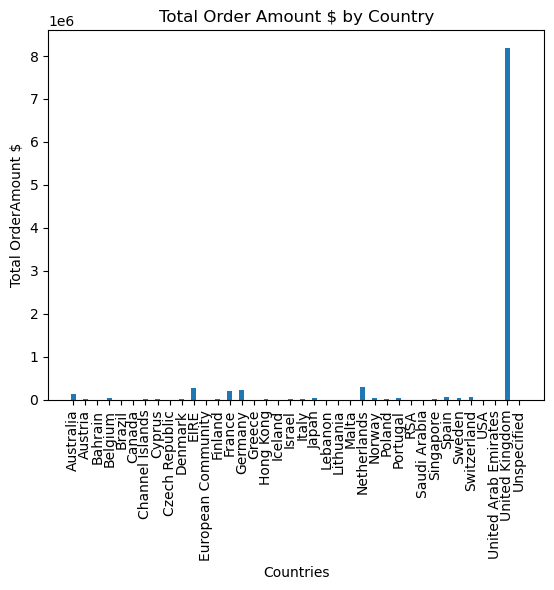

In [10]:
## Create bar char that shows Order Amount Sum by Country
plt.bar(country_sum_df["Country"], country_sum_df["OrderAmount"], width = 0.4)
plt.xlabel("Countries")
plt.ylabel("Total OrderAmount $")
plt.title("Total Order Amount $ by Country")
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

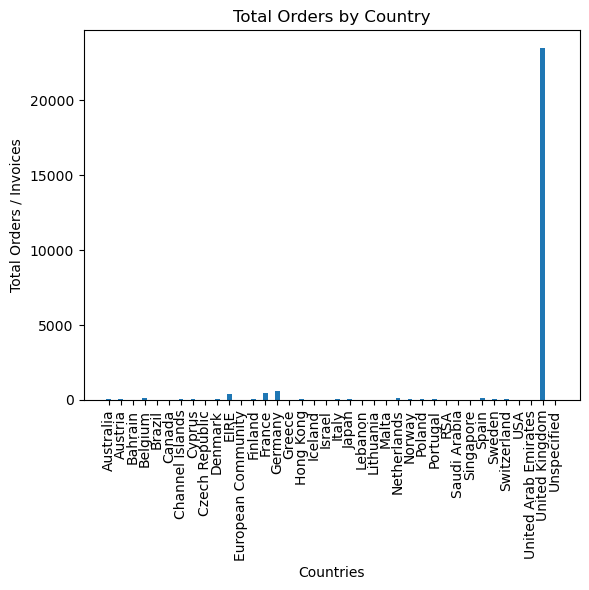

In [11]:
## Create bar char that shows Order Amount Sum by Country
plt.bar(country_sum_df["Country"], country_sum_df["InvoiceNo"], width = 0.4)
plt.xlabel("Countries")
plt.ylabel("Total Orders / Invoices")
plt.title("Total Orders by Country")
plt.xticks(rotation=90)
plt.show

In [12]:
## Find average OrderAmount and Quantity by Country
order_amount = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["OrderAmount"].reset_index()
quantity = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["Quantity"].reset_index()
avg_order_amount = order_amount.groupby(["Country"]).mean()["OrderAmount"].reset_index()
avg_quantity = quantity.groupby(["Country"]).mean()["Quantity"].reset_index()
avg_quantity.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/4241387504.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_amount = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["OrderAmount"].reset_index()
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/4241387504.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = ecommerce_df.groupby(["Country", "InvoiceNo"]).sum()["Quantity"].reset_index()
/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/4241387504.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In

,Country,Quantity
0,Australia,1212.362319
1,Austria,254.052632
2,Bahrain,65.000000
3,Belgium,194.554622
4,Brazil,356.000000


In [13]:
## Round values to shorten decimals
avg_quantity.Quantity = avg_quantity.Quantity.round(0)
avg_order_amount.OrderAmount = avg_order_amount.OrderAmount.round(2)
avg_quantity.head()

,Country,Quantity
0,Australia,1212.0
1,Austria,254.0
2,Bahrain,65.0
3,Belgium,195.0
4,Brazil,356.0


<function matplotlib.pyplot.show(close=None, block=None)>

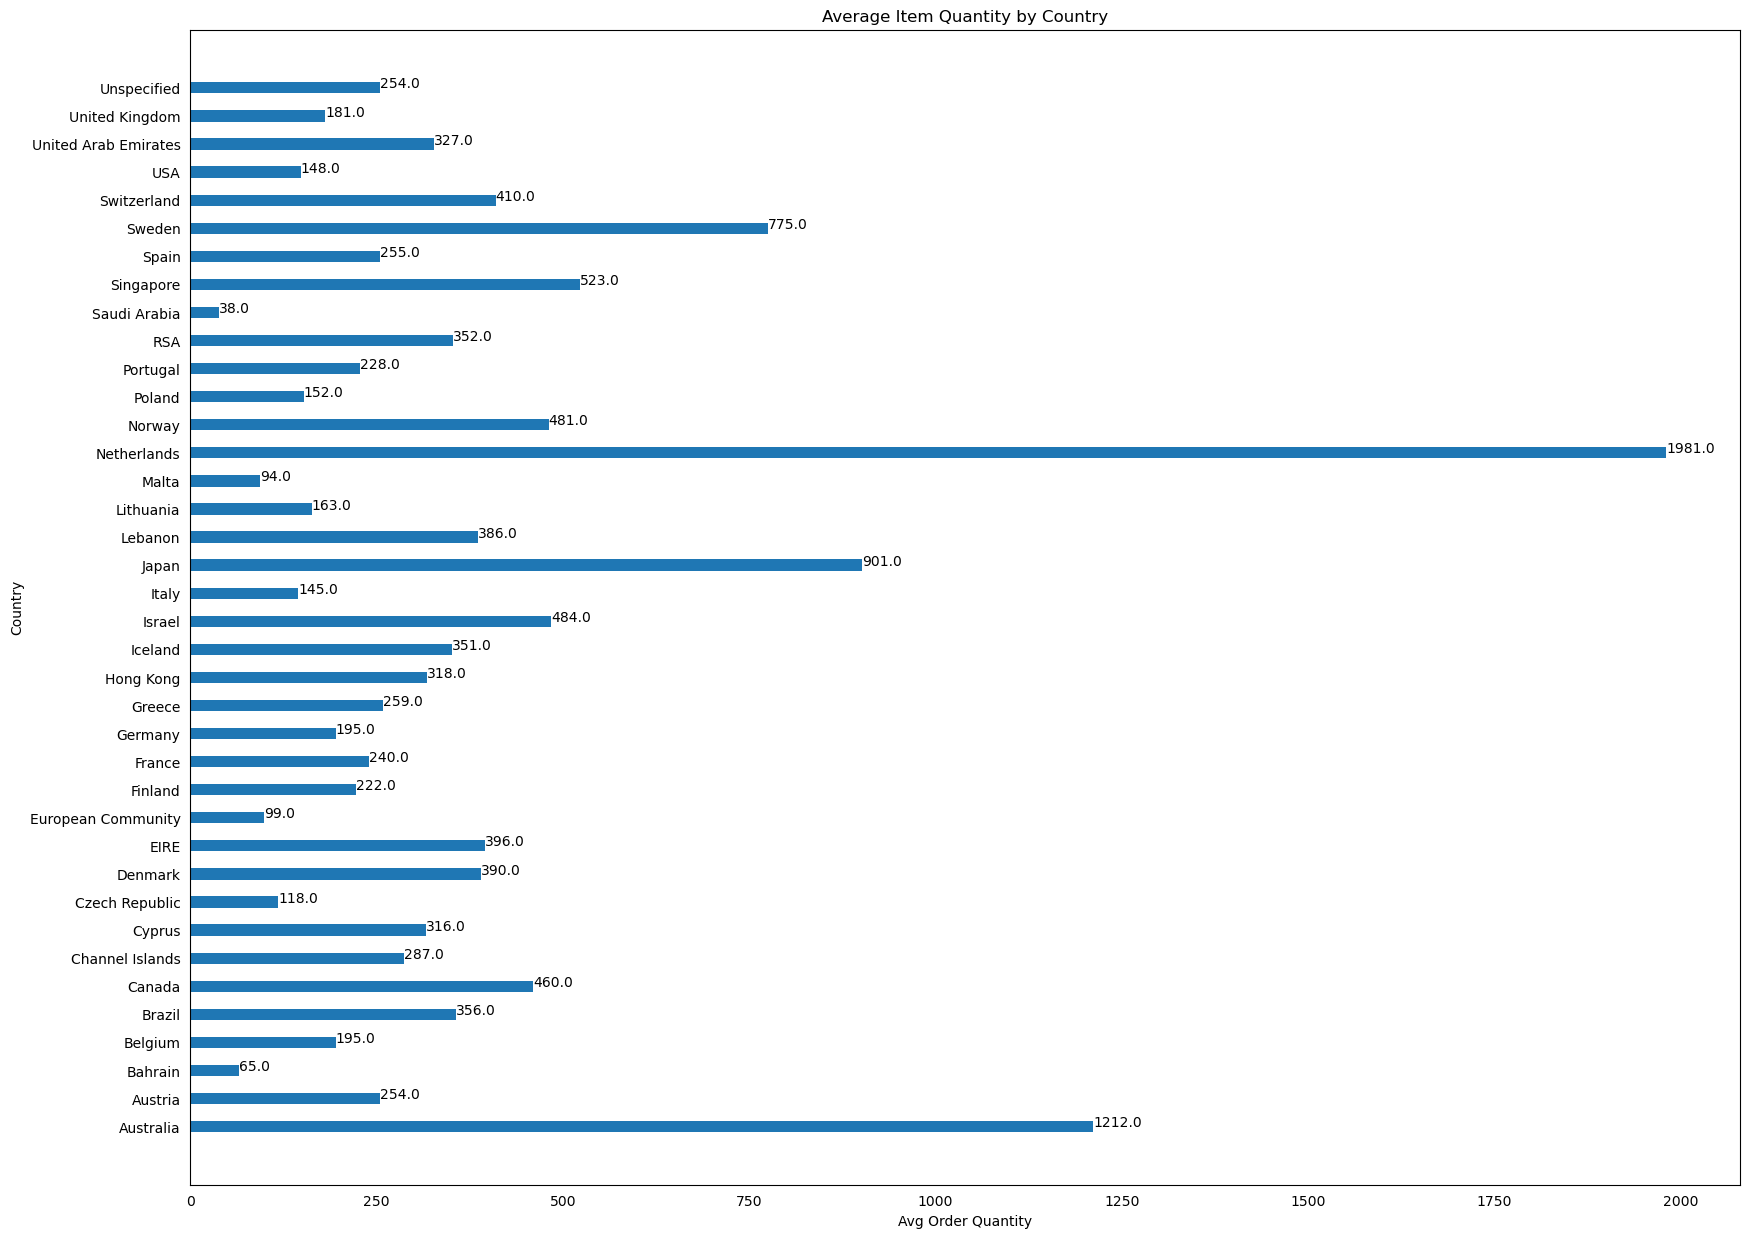

In [14]:
## Create bar char that shows average Order Quantity by Country        
plt.figure(figsize = (20,15))
plt.barh(avg_quantity["Country"], avg_quantity["Quantity"], height = 0.4)
plt.xlabel("Avg Order Quantity")
plt.ylabel("Country")
plt.title("Average Item Quantity by Country")
plt.tick_params(bottom = False, left = False)

for index, value in enumerate(avg_quantity["Quantity"]):
    plt.text(value, index,
             str(value))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

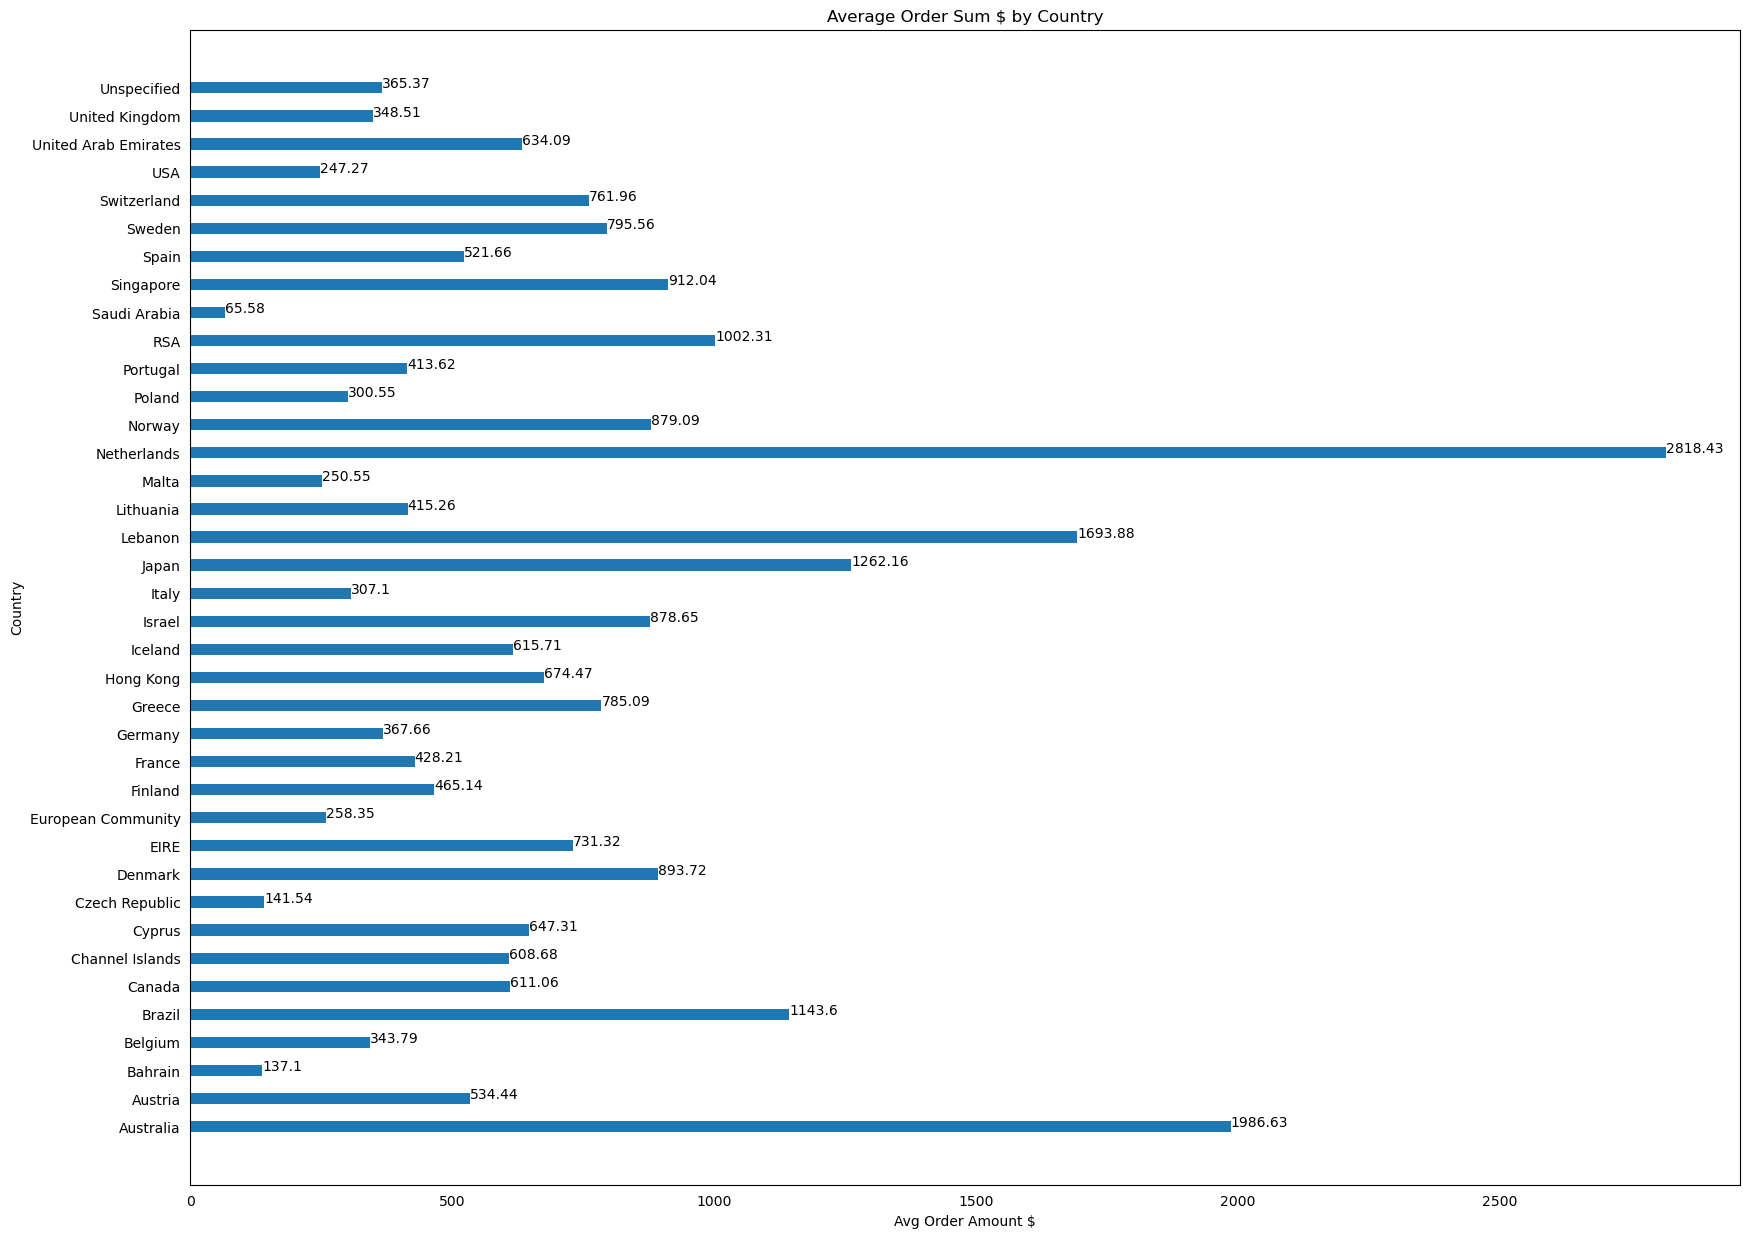

In [15]:
## Create bar char that shows average Order Amount by Country
plt.figure(figsize = (20,15))
plt.barh(avg_order_amount["Country"], avg_order_amount["OrderAmount"], height = 0.4)
plt.xlabel("Avg Order Amount $")
plt.ylabel("Country")
plt.title("Average Order Sum $ by Country")
plt.tick_params(bottom = False, left = False)
for index, value in enumerate(avg_order_amount["OrderAmount"]):
    plt.text(value, index,
             str(value))
plt.show

In [17]:
## Create a new column with InvoiceDate as DateTime
ecommerce_df["MonthYear"] = pd.to_datetime(ecommerce_df.InvoiceDate)
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [18]:
## Confirm new column has the correct datatype
ecommerce_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
OrderAmount           float64
MonthYear      datetime64[ns]
dtype: object

In [19]:
## Convert MonthYear column to YYYY-MM
ecommerce_df["MonthYear"] = ecommerce_df["MonthYear"].dt.to_period('M')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [20]:
## Create a new dataframe that sums OrderAmount by MonthYear
monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]
monthly_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/3274442770.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]


MonthYear
2010-12    748957.020
2011-01    560000.260
2011-02    498062.650
2011-03    683267.080
2011-04    493207.121
Freq: M, Name: OrderAmount, dtype: float64

In [21]:
## Convert MonthYear period index to string before plotting grid
monthly_order_amount_df.index = monthly_order_amount_df.index.astype(str)

<function matplotlib.pyplot.show(close=None, block=None)>

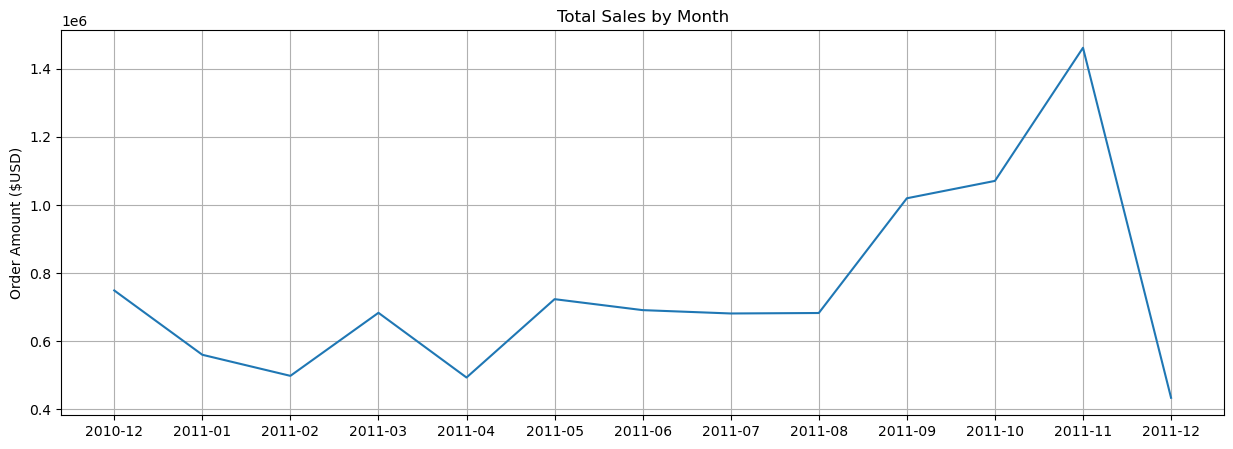

In [22]:
## Create a graph to display total OrderAmount by MonthYear
plt.figure(figsize=(15,5))
plt.plot(monthly_order_amount_df)
plt.grid(True)
plt.title("Total Sales by Month")
plt.ylabel("Order Amount ($USD)")
plt.show

In [23]:
## Create a new Column Date from Invoice Date
ecommerce_df["Date"] = pd.to_datetime(ecommerce_df.InvoiceDate)
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00


In [24]:
## Create new column to show weekday of Order
ecommerce_df["Weekday"] = ecommerce_df["Date"]
ecommerce_df["Weekday"] = ecommerce_df["Weekday"].dt.strftime('%A')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear,Date,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01 08:26:00,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01 08:26:00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01 08:26:00,Wednesday


In [25]:
# Convert Date column to YYYY-MM-DD
ecommerce_df["Date"] = ecommerce_df["Date"].dt.to_period('D')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderAmount,MonthYear,Date,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,Wednesday


In [26]:
## Create a new dataframe to count the number of Orders (InvoiceNo) by Weekday 
weekday_count_df = ecommerce_df.groupby("Weekday")["InvoiceNo"].nunique()
weekday_count_df.index = pd.Categorical(weekday_count_df.index, categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
weekday_count_df = weekday_count_df.sort_index()
weekday_count_df = weekday_count_df.reset_index()
weekday_count_df.rename(columns={"index":"Weekday"})
weekday_count_df

,index,InvoiceNo
0,Monday,4138
1,Tuesday,4722
2,Wednesday,4815
3,Thursday,5660
4,Friday,4184
5,Sunday,2381


<function matplotlib.pyplot.show(close=None, block=None)>

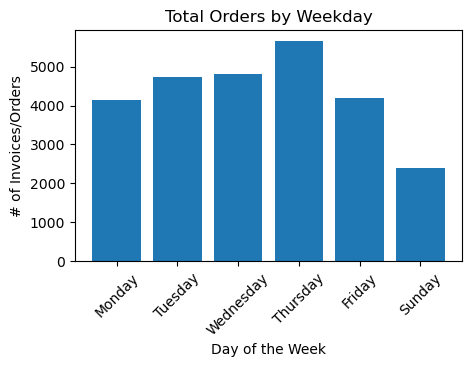

In [27]:
## Create bar char that shows Invoice Count by Weekday
plt.figure(figsize=(5,3))
plt.bar(weekday_count_df["index"], weekday_count_df["InvoiceNo"])
plt.xlabel("Day of the Week")
plt.ylabel("# of Invoices/Orders")
plt.title("Total Orders by Weekday")
plt.xticks(rotation=45)
plt.show

# Time Series Forecasting with Prophet

## Predicting Known Values

In [28]:
## Create a new dataframe that sums OrderAmount by Date
daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]
daily_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/3360653355.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]


Date
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
Freq: D, Name: OrderAmount, dtype: float64

In [29]:
## Setup forecaster using Prophet to train dataset
forecaster = Prophet()
horizon = 30
daily_forecast_df = daily_order_amount_df

y_train = daily_forecast_df[:-horizon]
y_test = daily_forecast_df.tail(horizon)

## Fit the forecaster
forecaster.fit(y_train)

11:08:33 - cmdstanpy - INFO - Chain [1] start processing
11:08:33 - cmdstanpy - INFO - Chain [1] done processing


Prophet()

In [30]:
## Create a forecaster horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2011-11-06', '2011-11-07', '2011-11-08', '2011-11-09',
             '2011-11-10', '2011-11-11', '2011-11-13', '2011-11-14',
             '2011-11-15', '2011-11-16', '2011-11-17', '2011-11-18',
             '2011-11-20', '2011-11-21', '2011-11-22', '2011-11-23',
             '2011-11-24', '2011-11-25', '2011-11-27', '2011-11-28',
             '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
             '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
             '2011-12-08', '2011-12-09'],
            dtype='period[D]', name='Date', is_relative=False)

In [31]:
## Create Predictions
y_pred = forecaster.predict(fh)
y_pred

Date
2011-11-06    27190.638200
2011-11-07    42360.111065
2011-11-08    48310.597073
2011-11-09    42113.489489
2011-11-10    50682.361785
2011-11-11    41875.265566
2011-11-13    28039.972791
2011-11-14    43209.445656
2011-11-15    49159.931664
2011-11-16    42962.824080
2011-11-17    51531.696375
2011-11-18    42724.600157
2011-11-20    28889.307382
2011-11-21    44058.780247
2011-11-22    50009.266255
2011-11-23    43812.158671
2011-11-24    52381.030966
2011-11-25    43573.934748
2011-11-27    29738.641972
2011-11-28    44908.114838
2011-11-29    50858.600846
2011-11-30    44661.493262
2011-12-01    53230.365557
2011-12-02    44423.269339
2011-12-04    30587.976563
2011-12-05    45757.449428
2011-12-06    51707.935437
2011-12-07    45510.827853
2011-12-08    54079.700148
2011-12-09    45272.603930
Freq: D, Name: OrderAmount, dtype: float64

In [32]:
## Create 90% confidence interval
ci = forecaster.predict_interval(fh, coverage=0.9)
ci.head()

OrderAmount              
                     0.9              
                   lower         upper
Date                                  
2011-11-06   8730.415193  46746.162194
2011-11-07  23335.635122  61816.014624
2011-11-08  30457.276934  68191.737514
2011-11-09  23943.445819  60748.368147
2011-11-10  31939.242339  70095.416535

In [33]:
## Specify y_true to compare if predictions are accurate
y_true = daily_forecast_df.tail(horizon)
y_true

Date
2011-11-06     42912.40
2011-11-07     70001.08
2011-11-08     56647.66
2011-11-09     62599.43
2011-11-10     68956.24
2011-11-11     54835.51
2011-11-13     33520.22
2011-11-14    112141.11
2011-11-15     60594.23
2011-11-16     64408.70
2011-11-17     60329.72
2011-11-18     48031.80
2011-11-20     34902.01
2011-11-21     48302.50
2011-11-22     62307.32
2011-11-23     78480.70
2011-11-24     48080.28
2011-11-25     50442.72
2011-11-27     20571.50
2011-11-28     55442.02
2011-11-29     72219.20
2011-11-30     59150.98
2011-12-01     51410.95
2011-12-02     57086.06
2011-12-04     24565.78
2011-12-05     57751.32
2011-12-06     54228.37
2011-12-07     75076.22
2011-12-08     81417.78
2011-12-09     32131.53
Freq: D, Name: OrderAmount, dtype: float64

In [34]:
## Check mean_error of predictions and true values
mean_error = mean_absolute_error(y_true, y_pred)
mean_error

15127.470221228314

In [35]:
## Convert period indexes to string before plotting grid
daily_forecast_df.index = daily_forecast_df.index.astype(str)
y_true.index = y_true.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

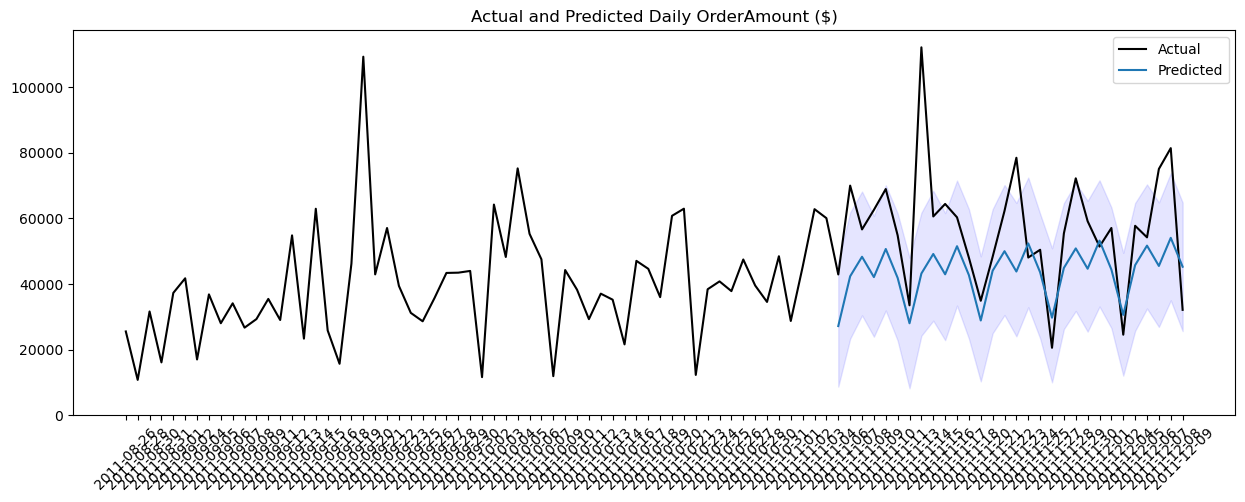

In [36]:
## Plot comparison of predictions and true values
plt.figure(figsize=(15,5))
plt.plot(
    daily_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Actual and Predicted Daily OrderAmount ($)")
plt.show()
plt.show()

In [37]:
## dataframe that sums OrderAmount by MonthYear
monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]
monthly_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/3126133268.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]


MonthYear
2010-12    748957.020
2011-01    560000.260
2011-02    498062.650
2011-03    683267.080
2011-04    493207.121
Freq: M, Name: OrderAmount, dtype: float64

In [38]:
## Setup Forecaster to train dataset for Monthly data
forecaster = Prophet()
horizon = 2
monthly_forecast_df = monthly_order_amount_df

y_train = monthly_forecast_df[:-horizon]
y_test = monthly_forecast_df.tail(horizon)

## Fit the forecaster
forecaster.fit(y_train)

## Create forecast horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

## Create predictions
y_pred = forecaster.predict(fh)

## Create 90% confidence interval
ci = forecaster.predict_interval(fh, coverage=0.9)

## Specify y_true to compare if predictions are accurate
y_true = monthly_forecast_df.tail(horizon)

11:09:25 - cmdstanpy - INFO - Chain [1] start processing
11:09:25 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
## Check mean_error of predictions and true values
mean_error = mean_absolute_error(y_true, y_pred)
mean_error

532905.6373747077

In [40]:
## Convert period indexes to string before plotting grid
monthly_forecast_df.index = monthly_forecast_df.index.astype(str)
y_true.index = y_true.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

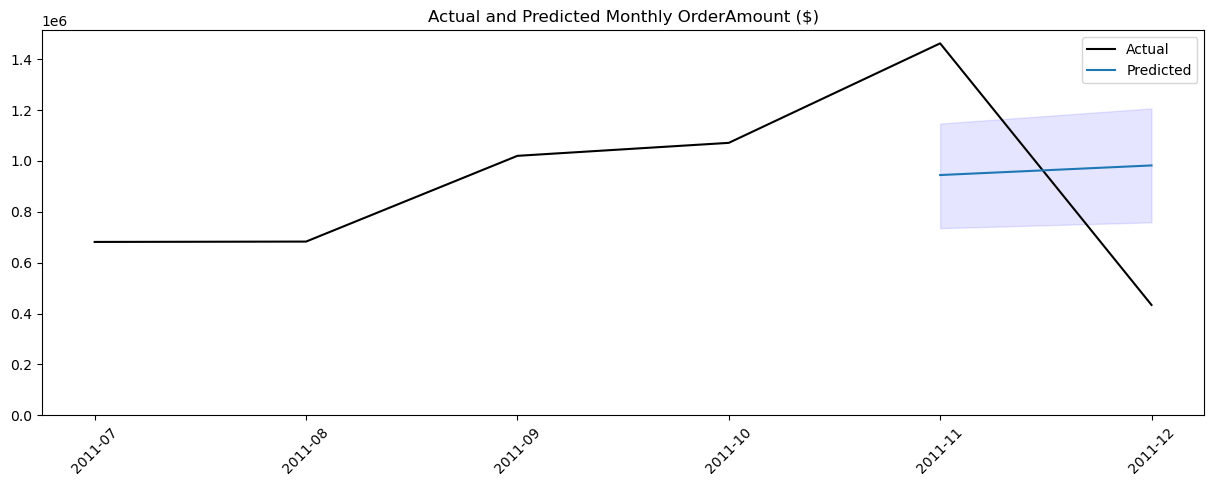

In [41]:
## Plot comparison of predictions and true values
plt.figure(figsize=(15,5))
plt.plot(
    monthly_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Actual and Predicted Monthly OrderAmount ($)")
plt.show()
plt.show()

## Time Series Forecasting to Predict Future Values - Daily

In [42]:
## dataframe that sums OrderAmount by Date
daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]
daily_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/1084831159.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_order_amount_df = ecommerce_df.groupby(["Date"]).sum()["OrderAmount"]


Date
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
Freq: D, Name: OrderAmount, dtype: float64

In [43]:
## Setup forecaster, horizon, frequency
forecaster = Prophet()
horizon = 30
daily_forecast_df = daily_order_amount_df
forecaster.fit(daily_forecast_df)
last_date = daily_forecast_df.index.max()
fh = ForecastingHorizon(
    pd.date_range(str(last_date), periods=horizon, freq="D"),
    is_relative=False,
)

11:10:27 - cmdstanpy - INFO - Chain [1] start processing
11:10:27 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
## Check the last_date of the forecast dataframe
last_date

Period('2011-12-09', 'D')

In [45]:
## Create predictions and confidence interval
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")

In [46]:
## Convert period indexes to string before plotting grid
daily_forecast_df.index = daily_forecast_df.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

In [47]:
## Review predictions
y_pred

2011-12-09    53444.660879
2011-12-10    70919.246274
2011-12-11    39598.201340
2011-12-12    57194.221079
2011-12-13    61773.622669
2011-12-14    56864.570323
2011-12-15    64136.441871
2011-12-16    54876.628114
2011-12-17    72351.213509
2011-12-18    41030.168575
2011-12-19    58626.188314
2011-12-20    63205.589903
2011-12-21    58296.537558
2011-12-22    65568.409106
2011-12-23    56308.595349
2011-12-24    73783.180743
2011-12-25    42462.135810
2011-12-26    60058.155548
2011-12-27    64637.557138
2011-12-28    59728.504793
2011-12-29    67000.376341
2011-12-30    57740.562584
2011-12-31    75215.147978
2012-01-01    43894.103045
2012-01-02    61490.122783
2012-01-03    66069.524373
2012-01-04    61160.472027
2012-01-05    68432.343576
2012-01-06    59172.529818
2012-01-07    76647.115213
Name: OrderAmount, dtype: float64

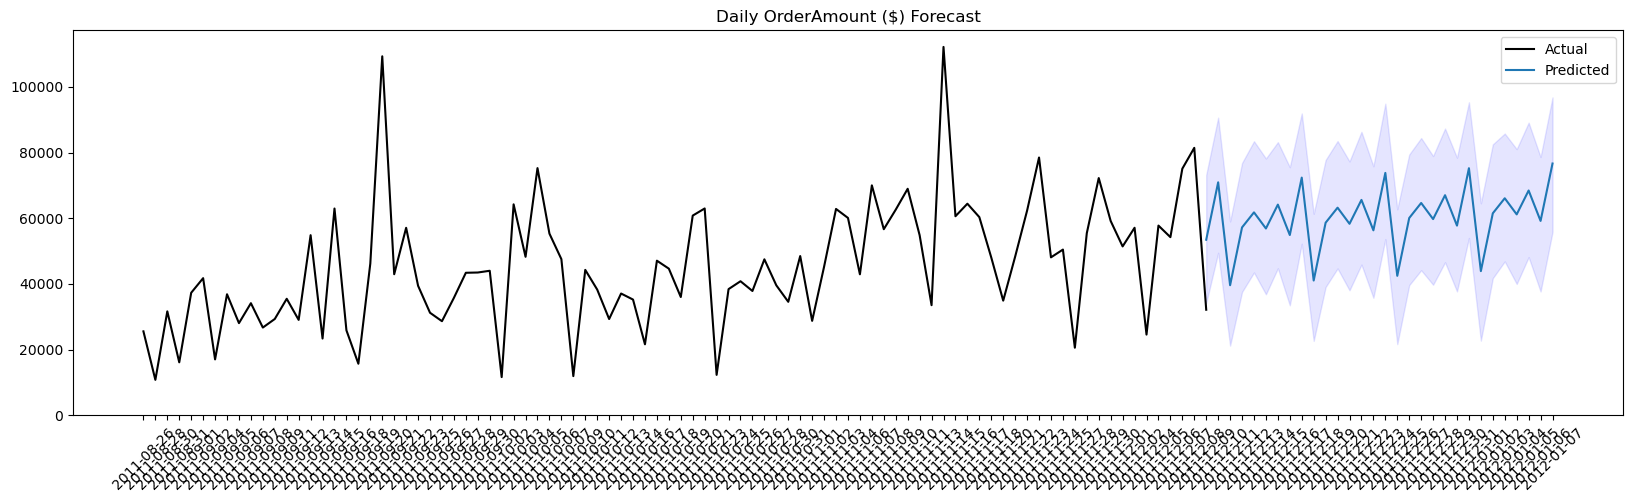

In [48]:
## Plot comparison of predictions and true values
plt.figure(figsize=(20,5))
plt.plot(
    daily_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Daily OrderAmount ($) Forecast")
plt.show()
plt.show()

## Time Series Forecasting to Predict Future Values - Monthly

In [49]:
## dataframe that sums OrderAmount by MonthYear
monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]
monthly_order_amount_df.head()

/var/folders/4_/pjpbm_rn3c5f4x2j3sb4cpb40000gn/T/ipykernel_70934/3126133268.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_order_amount_df = ecommerce_df.groupby(["MonthYear"]).sum()["OrderAmount"]


MonthYear
2010-12    748957.020
2011-01    560000.260
2011-02    498062.650
2011-03    683267.080
2011-04    493207.121
Freq: M, Name: OrderAmount, dtype: float64

In [50]:
## Setup Forecaster for Monthly data
forecaster = Prophet()
horizon = 2
monthly_forecast_df = monthly_order_amount_df
forecaster.fit(monthly_forecast_df)
last_date = monthly_forecast_df.index.max()
fh = ForecastingHorizon(pd.PeriodIndex(
    pd.date_range(str(last_date), periods=horizon, freq="M")), is_relative=False)

## Create predictions and confidence interval
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")


11:11:31 - cmdstanpy - INFO - Chain [1] start processing
11:11:31 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
## Convert period indexes to string before plotting grid
monthly_forecast_df.index = monthly_forecast_df.index.astype(str)
y_pred.index = y_pred.index.astype(str)
ci.index = ci.index.astype(str)

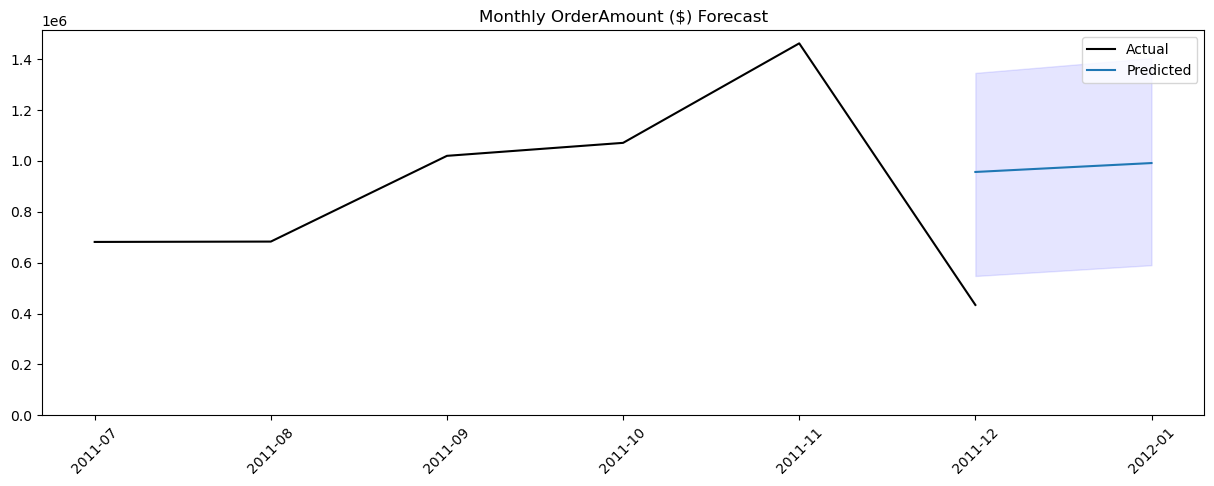

In [52]:
## Plot comparison of predictions and true values
plt.figure(figsize=(15,5))
plt.plot(
    monthly_forecast_df.tail(horizon * 3), 
    label="Actual", 
    color="Black")

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1)

plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.xticks(rotation=45)
plt.title("Monthly OrderAmount ($) Forecast")
plt.show()
plt.show()